<a><h1> Linear Regression with PyTorch


<h6>we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<h6>we'll develop a collection of data points that appear random, but that fit a known linear equation y = 2x+1

<a><u><h3> Perform standard imports

In [130]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


<a><u><h3> Create a column matrix of X values

In [131]:
#CREATED X
X= torch.linspace(1,50,50).reshape(-1,1)
print(X)
print(X.shape)

#this will give 50 rows and 1 column

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])
torch.Size([50, 1])


<h6> Note that when we created tensor X, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that y doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between X and y.

<a><u><h3> Create a "Random" array of error values

We want 50 random integer values that collectively cancel each other out.

In [132]:
#CREATED ERROR
torch.manual_seed(71)
# this ensures whenever a random is generated it is same
# to obtain reproducible results

e=torch.randint(-8,9,(50,1),dtype=torch.float)

# (50,1) is the o/p Size
# -8,9 is the range

#to ensure that they cancel each other
print(e.sum())

tensor(0.)


<a><u><h3> Create a column matrix of y values


In [133]:
#CREATED Y
# WE will set our own parameters of weight =2, bias =1, plus the error amount.
# y will have same shape as X and e

y = 2*X + 1 + e
print(y.shape)


torch.Size([50, 1])


Now we know that we have used function y=2x +e <br>
we will give x and y to the network and train it to predict complete function

<a><u><h3> Plot the results </a></u></h3>
We have to convert tensors to NumPy arrays just for plotting.

Text(0.5, 0, 'x')

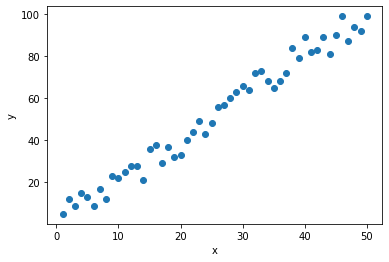

In [134]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

<a><u><h3> Simple Linear model </a></u></h3>

In [135]:
# built-in nn.Linear() model preselects weight and bias values randomly.

torch.manual_seed(59)

# nn.linear model conatains 3 parameters, 2 written below and one is bias = True 
model = nn.Linear(in_features=1, out_features=1)

# in_features = 1 as we are giving only one x
# out_feature = 1 as we are predicting only one y

print(model.weight)
print(model.bias)
# observation - Automatically , requires_grad = True
# now we will write & perform this in a class (below) 

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


<a><u><h3> Model classes </a></u></h3>

PyTorch lets us define models as object classes that can store multiple model layers.<br>
 For now, though, we only need a single <tt>linear</tt> layer.

In [136]:
# nn.Module is base class for all Modules
class Model(nn.Module):

    #Constructor
    def __init__(self, in_features, out_features):
        #calls parent class nn.Module
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        # or (its same)
        # self.in_features = in_features
        # self.out_features = out_features
        # self.bias = bias

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [137]:
torch.manual_seed(59)

#passes no of incoming and outgoing features
model= Model(1,1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias: ',model.linear.bias.item())

#model.linear.weight will give tensor

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:  0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [138]:
# second way of iterations
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


Now let's see the result when we pass a tensor into the model.

In [139]:
# passing just a random value to check if the model is working
x= torch.tensor([2.0])
print(model.forward(x))
# forward is just a method which applies linear transformation y=w*X+b 

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

<a><u><h3> Plot the initial Model </a></u></h3>

We can plot the untrained model against our dataset to get an idea of our starting point.

In [140]:
w1 = model.linear.weight.item()
b1 = model.linear.bias.item()
print('Initial weight: ', w1)
print('Initial bias: ', b1)

# upper and lower boundaries
x1= np.array([X.min(),X.max()])
#mind that we have X not x
print("x1= ",x1)

y1 = x1*w1 +b1
print("y1:-  ",y1)

# y1,x1 will give us the line we are fitting


Initial weight:  0.10597813129425049
Initial bias:  0.9637961387634277
x1=  [ 1. 50.]
y1:-   [1.0697743 6.2627025]


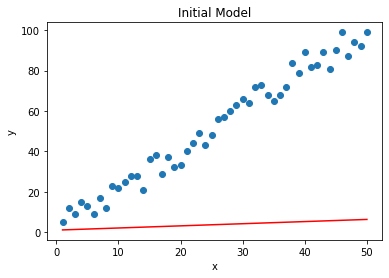

In [141]:
plt.scatter(X.numpy(), y.numpy())
# red line we are fitting
plt.plot(x1,y1,'r')

plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

<a><u><h3> SETTING THE LOSS fUNCTION </a></u></h3>

built in - Mean Squared Error (MSE)

By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [142]:
criterion = nn.MSELoss()

<a><u><h3> SETTING THE OPTIMIZATION </a></u></h3>

Here we'll use <a>Stochastic Gradient Descent</a> (SGD) with an applied <a>learning rate</a> (lr) of 0.001.

For more complicated (multivariate) data, you might also consider passing optional <a><tt>momentum</tt></a> and <a><tt>weight_decay</tt></a> arguments.

In [143]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# or lr = 1e-3

<a><u><h3> Train the Model </a></u></h3>

we know before thand tha weight = 2 and Bias =1.

Now we need to train our model such that wight and bias converges to their original values.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=yellow>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=yellow>losses = []</font></tt><br>
<tt><font color=yellow>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=yellow>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [144]:
epochs = 50
losses = []

for i in range(epochs):
    i=i+1
    y_pred = model.forward(X)
    loss  = criterion(y_pred,y)
    losses.append(loss.item())
    print("epoch: {:2} loss: {:10.8f} weight: {:10.8f} bias: {:10.8f}" \
    .format(i, loss.item(), model.linear.weight.item(), model.linear.bias.item()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1 loss: 3057.21679688 weight: 0.10597813 bias: 0.96379614
epoch:  2 loss: 1588.53112793 weight: 3.33490038 bias: 1.06046367
epoch:  3 loss: 830.29998779 weight: 1.01483274 bias: 0.99226284
epoch:  4 loss: 438.85241699 weight: 2.68179965 bias: 1.04252183
epoch:  5 loss: 236.76152039 weight: 1.48402119 bias: 1.00766504
epoch:  6 loss: 132.42912292 weight: 2.34460592 bias: 1.03396463
epoch:  7 loss: 78.56572723 weight: 1.72622538 bias: 1.01632178
epoch:  8 loss: 50.75775909 weight: 2.17050409 bias: 1.03025162
epoch:  9 loss: 36.40123367 weight: 1.85124576 bias: 1.02149546
epoch: 10 loss: 28.98922920 weight: 2.08060074 bias: 1.02903891
epoch: 11 loss: 25.16238213 weight: 1.91576838 bias: 1.02487016
epoch: 12 loss: 23.18647385 weight: 2.03416562 bias: 1.02911627
epoch: 13 loss: 22.16612625 weight: 1.94905841 bias: 1.02731562
epoch: 14 loss: 21.63911057 weight: 2.01017213 bias: 1.02985907
epoch: 15 loss: 21.36677170 weight: 1.96622372 bias: 1.02928054
epoch: 16 loss: 21.22591782 weig

<a><u><h3> Plot the Loss Value 

Text(0.5, 0, 'epoch')

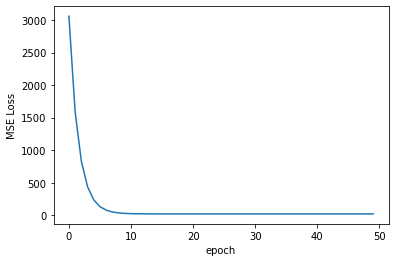

In [145]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('epoch')

<a><u><h3> Plot the Result

Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [146]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


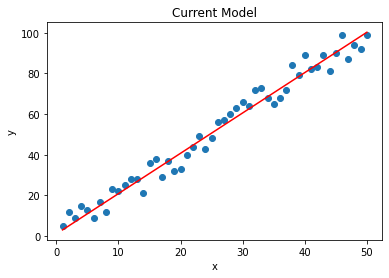

In [147]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');